## 這裡先把有問題的檔案先刪除
## 例如起始的VAE解編碼有問題以致於根本沒有開始優化
## 或是迭代過程中持續沒有找到更好的組合，Fitness都是1e-08以下的組合

In [8]:
import os
import re
import shutil

import matplotlib.pyplot as plt

# TARGET_NAME = 'Reation Yield'

In [9]:
def plot_fitness_vs_iteration(iteration_list, fitness_list, save_path=None):
    # Plot Fitness vs Iteration
    plt.figure(figsize=(8, 6))
    plt.plot(iteration_list, fitness_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Fitness vs Iteration')
    plt.grid(True)

    if save_path is not None:
        file_name = f'fitness.jpg'
        file_path = os.path.join(save_path, file_name)
        plt.savefig(file_path, dpi=300)
    else:
        plt.show()

In [10]:
def plot_mean_std_vs_iteration(iteration_list, data_list, name, save_path=None):
    # Extract mean and std values from data list
    mean_values = [data[0] for data in data_list]
    # print(mean_values)
    std_values = [data[1] for data in data_list]

    # Plot mean and std values vs Iteration
    plt.figure(figsize=(10, 6))
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    ax1.plot(iteration_list, mean_values, 'b-o', label=f'{name} (mean)')
    ax2.plot(iteration_list, std_values, 'r-o', label=f'{name} (std)')

    ax1.set_xlabel('Iteration')
    ax1.set_ylabel(f'{name} (mean)', color='b')
    ax2.set_ylabel(f'{name} (std)', color='r')

    # Set the y-axis limits for each axis separately
    ax1.set_ylim(min(mean_values)*0.9, max(mean_values)*1.1)
    ax2.set_ylim(min(std_values)*0.9, max(std_values)*1.1)

    ax1.tick_params(axis='y', colors='b')
    ax2.tick_params(axis='y', colors='r')

    plt.title(f'{name} (mean and std) vs Iteration')
    plt.grid(True)

    # Set the legends
    ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
    ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

    if save_path is not None:
        file_name = f'{name}.jpg'
        file_path = os.path.join(save_path, file_name)
        plt.savefig(file_path, dpi=300)
    else:
        plt.show()

In [11]:
def get_all_pictures(folder_path):
    if os.path.exists(folder_path):
        # Get the list of files in the folder
        file_list = [file for file in os.listdir(folder_path) if '.sh.o' in file]
        print("Files with '.sh.o' in the folder:")
        for file in file_list:
            file_path = os.path.join(folder_path, file)
            with open(file_path, 'r') as f:
                file_content = f.read()
            print(f"File: {file}")
    else:
        print(f"Folder '{folder_path}' does not exist.")

    parts = file_content.split('\n\n')
    iteration_detials = parts[-2]
    # ranks = rank_detials.split("-------------------------")
    # print(iteration_detials)

    # 使用正则表达式匹配和提取Iteration列表及其属性的数字
    iteration_list = re.findall(r'Iteration (\d+)', iteration_detials)
    fitness_list = re.findall(r'Fitness:\s([0-9]+\.[0-9]{4}[eE][+-][0-9]{2})', iteration_detials)
    # fitness_list = re.findall(r'Fitness:\s([0-9]+\.[0-9]+)', iteration_detials)
    optimization_target_list = re.findall(r'Reation Yield: ([\d., -]+)', iteration_detials)

    # 將迭代數字列表轉換為整數或浮點數
    iteration_list = [int(iteration) for iteration in iteration_list]

    # 将提取的数字字符串转换为列表形式
    fitness_list = [float(fitness) for fitness in fitness_list]
    optimization_target_list = [list(map(float, dimple.replace('. ', ', ').split(', '))) for dimple in optimization_target_list]
    # print('optimization_target_list', optimization_target_list)

    plot_mean_std_vs_iteration(iteration_list, optimization_target_list, 'Reation Yield',folder_path)
    plot_fitness_vs_iteration(iteration_list, fitness_list, folder_path)

In [12]:
#methods = ['ABC', 'GA', 'PSO', 'SA']
methods = ['ABC', 'PSO']
methods = ['PSO/round6', 'PSO/round7', 'PSO/round8', 'PSO/round9',  'PSO/round10']
#methods = ['PSO/round1', 'PSO/round2', 'PSO/round3', 'PSO/round4']
sub_categories = ['c4']

# current_folder = os.getcwd() # 這裡有bug
current_folder = '/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis'
print(current_folder)
for method in methods:
    print(f'{method} Part:')
    folder_path = os.path.join(current_folder, f'{method}/{sub_categories[0]}')
    os.chdir(folder_path)
    # 獲取當前目錄下有".sh.o"在裡面的文件名
    file_names = [file for file in os.listdir(os.getcwd()) if '.sh.o' in file]

    # 提取数字部分並創建相對應的文件
    for file_name in file_names:
        #創建資料夾
        num = file_name.split(".sh.o")[1]
        folder_name = "Result" + num
        os.makedirs(folder_name, exist_ok=True)
        
        # 將文件移動到資料夾內
        shutil.move(file_name, folder_name)
        rank = 1
        folder_path = os.path.join(os.getcwd(), folder_name)
        get_all_pictures(folder_path)
    os.chdir(current_folder)  # change back to the original directory

/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis
PSO/round6 Part:
PSO/round7 Part:
PSO/round8 Part:
PSO/round9 Part:
PSO/round10 Part:


In [13]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_best_trajectories_in_subfolders(folder_path):
    print(f"🔍 Running plot_best_trajectories_in_subfolders on: {folder_path}")

    result_folders = [d for d in os.listdir(folder_path)
                      if os.path.isdir(os.path.join(folder_path, d)) and d.lower().startswith('result')]

    if not result_folders:
        print(f"⚠️ No Result folders found in {folder_path}, skipping.")
        return

    trajectories = []

    for result_folder in result_folders:
        result_folder_path = os.path.join(folder_path, result_folder)
        file_names = [f for f in os.listdir(result_folder_path) if f.startswith('tmp.sh.o')]
        if not file_names:
            continue

        for file_name in file_names:
            file_path = os.path.join(result_folder_path, file_name)
            try:
                with open(file_path, 'r') as f:
                    file_content = f.read()

                parts = file_content.split('\n\n')
                iteration_details = parts[-2]

                iteration_list = re.findall(r'Iteration (\d+)', iteration_details)
                crystal_size_list = re.findall(r'Reation Yield: ([\d., -]+)', iteration_details)

                iteration_list = [int(it) for it in iteration_list]
                # 抓每次 iteration 的第一名 crystal_size (只取第一個數字)
                best_crystal_sizes = []
                for entry in crystal_size_list:
                    first_value = float(entry.split(',')[0].strip())
                    best_crystal_sizes.append(first_value)

                trajectories.append({
                    'iterations': iteration_list,
                    'crystal_sizes': best_crystal_sizes
                })

            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")
                continue

    if not trajectories:
        print(f"⚠️ No valid trajectories found in {folder_path}.")
        return

    max_iteration = max(max(traj['iterations']) for traj in trajectories)
    all_iterations = np.arange(1, max_iteration + 1)

    traj_matrix = []
    for traj in trajectories:
        cs_array = np.full(max_iteration, np.nan)
        for it, cs in zip(traj['iterations'], traj['crystal_sizes']):
            cs_array[it - 1] = cs
        traj_matrix.append(cs_array)

    traj_matrix = np.array(traj_matrix)
    mean_crystal_size = np.nanmean(traj_matrix, axis=0)

    # 畫圖
    plt.figure(figsize=(8, 6))

    for i in range(traj_matrix.shape[0]):
        plt.plot(all_iterations, traj_matrix[i], linestyle='--', color='gray', alpha=0.4)

    plt.plot(all_iterations, mean_crystal_size, linestyle='-', color='blue', linewidth=2, label='Mean Best Crystal Size')

    plt.xlabel('Iteration')
    plt.ylabel('Best Yield')
    plt.title(f'Best Yield Trajectories in {os.path.basename(folder_path)}')
    plt.legend()
    plt.grid(True)

    save_path = os.path.join(folder_path, 'best_trajectories_with_mean.png')
    plt.savefig(save_path, dpi=300)
    plt.show()
    plt.close()

    print(f"✅ Best trajectory plot saved at {save_path}")


PSO/round6 Part:
🔍 Running plot_best_trajectories_in_subfolders on: /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round6/c4


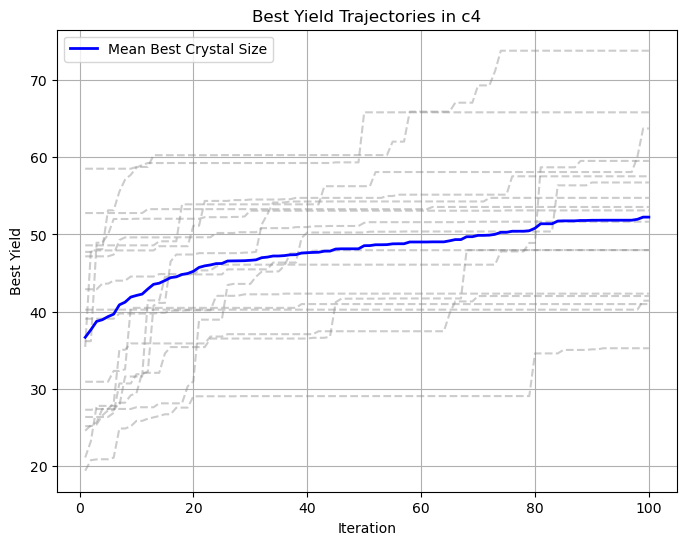

✅ Best trajectory plot saved at /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round6/c4/best_trajectories_with_mean.png
PSO/round7 Part:
🔍 Running plot_best_trajectories_in_subfolders on: /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round7/c4


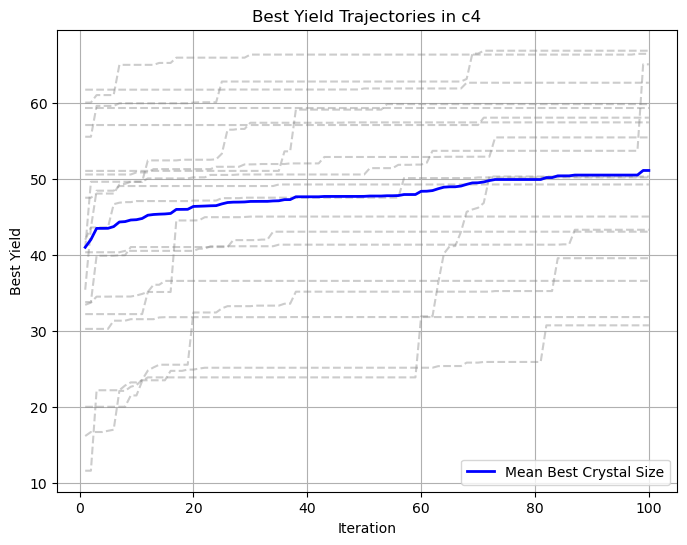

✅ Best trajectory plot saved at /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round7/c4/best_trajectories_with_mean.png
PSO/round8 Part:
🔍 Running plot_best_trajectories_in_subfolders on: /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round8/c4


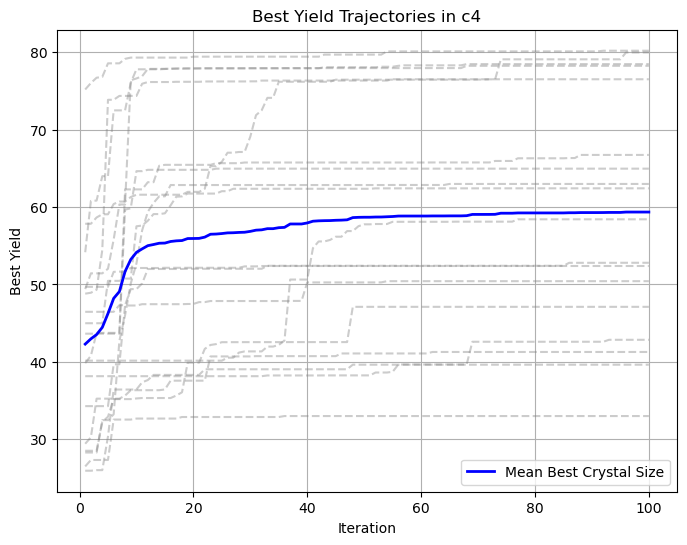

✅ Best trajectory plot saved at /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round8/c4/best_trajectories_with_mean.png
PSO/round9 Part:
🔍 Running plot_best_trajectories_in_subfolders on: /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round9/c4


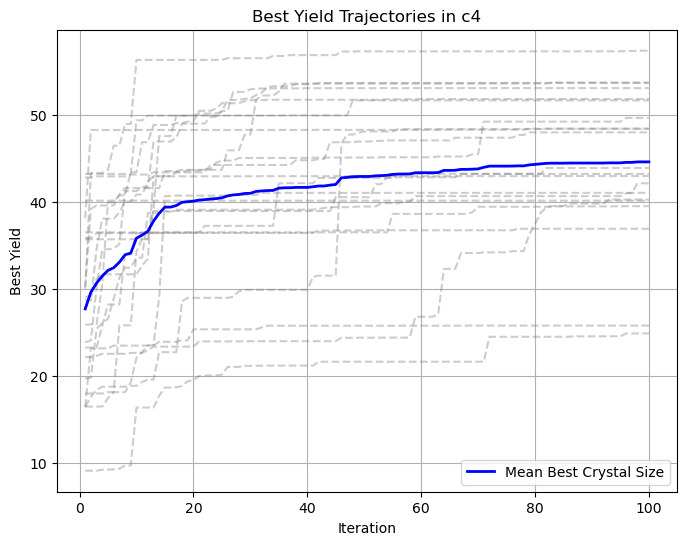

✅ Best trajectory plot saved at /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round9/c4/best_trajectories_with_mean.png
PSO/round10 Part:
🔍 Running plot_best_trajectories_in_subfolders on: /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round10/c4


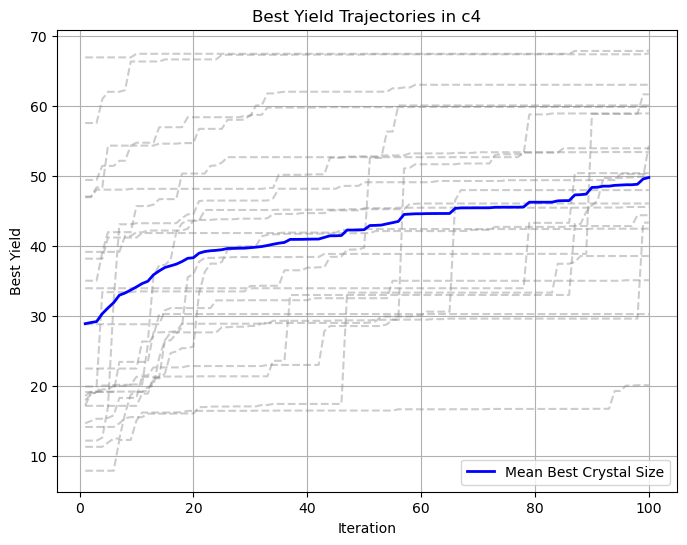

✅ Best trajectory plot saved at /home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/1_Preprocessing_for_Analysis/PSO/round10/c4/best_trajectories_with_mean.png


In [14]:

for method in methods:
    print(f'{method} Part:')
    folder_path = os.path.join(current_folder, f'{method}/{sub_categories[0]}')
    plot_best_trajectories_in_subfolders(folder_path)